In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
# Reading the dataset
people_charm = pd.read_csv('C:/Users/Subhadri/Desktop/Data Science - Term 1/Machine Learning/Assignment 2/People Charm case.csv')
people_charm.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [3]:
# Checking the number of rows and columns present in the data frame
people_charm.shape

(14999, 10)

In [4]:
# Checking whether there is any null value or not
people_charm.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [5]:
# Checking the unique values of the 'dept' columns
people_charm['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [6]:
# Checking the unique values of the 'salary' columns
people_charm['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [7]:
# Checking the duplicate values of the data
people_charm[people_charm.duplicated()].shape

(3008, 10)

In [8]:
# Dropping all the duplicate values present and creating a new data frame
people_charm_new = people_charm.drop_duplicates()
people_charm_new.shape

(11991, 10)

In [9]:
# Checking the skewness of the data
people_charm_new.skew()

satisfactoryLevel       -0.538702
lastEvaluation          -0.031686
numberOfProjects         0.332152
avgMonthlyHours          0.027208
timeSpent.company        1.816577
workAccident             1.914410
left                     1.795135
promotionInLast5years    7.490008
dtype: float64

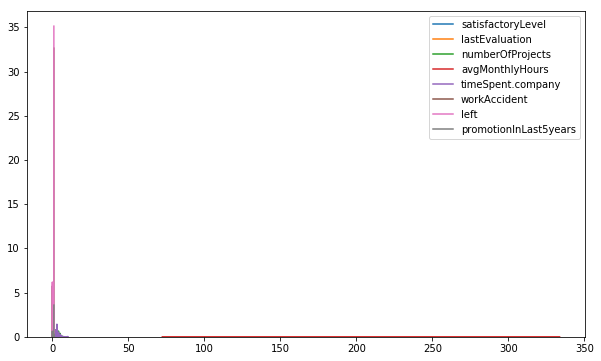

In [10]:
# Getting the distribution of the data using Kernel Density ('kde') Plot
plt.figure(figsize=(10,6))
sb.kdeplot(people_charm_new['satisfactoryLevel'])
sb.kdeplot(people_charm_new['lastEvaluation'])
sb.kdeplot(people_charm_new['numberOfProjects'])
sb.kdeplot(people_charm_new['avgMonthlyHours'])
sb.kdeplot(people_charm_new['timeSpent.company'])
sb.kdeplot(people_charm_new['workAccident'])
sb.kdeplot(people_charm_new['left'])
sb.kdeplot(people_charm_new['promotionInLast5years'])

In [11]:
# Finding the correlation among the variables
people_charm_new.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


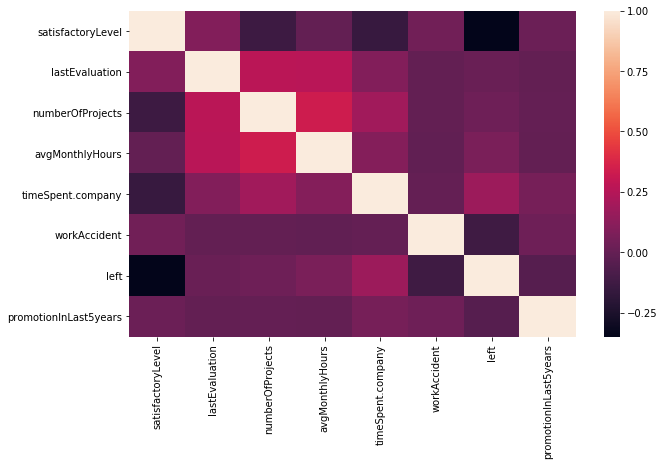

In [12]:
# Plotting the orrelation using Heatmap
plt.figure(figsize=(10,6))
sb.heatmap(people_charm_new.corr())

In [13]:
# 'get_dummies' helps in converting categorical data to numerical data creating separate columns
people_charm_new = pd.get_dummies(people_charm_new, columns = ['dept'])
people_charm_new.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
3,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
4,0.41,0.50,2,153,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0


In [14]:
# Label Encoder helps in specifying a unique numerical value for each unique categorical value present in the column
le = LabelEncoder()
people_charm_new['salary'] = le.fit_transform(people_charm_new['salary'])
people_charm_new.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [15]:
# Checking the number of rows and columns present in the new data frame
people_charm_new.shape

(11991, 19)

### None of the standardization or normalization techniques are applicable here as there is no such difference for changing the skewness to a normal distribution.

In [16]:
X = people_charm_new.drop(['left'], axis = 1)
Y = people_charm_new['left']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [18]:
print(x_train.shape)
print(x_test.shape)

(9592, 18)
(2399, 18)


### KNearestNeighbors (KNN)

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred1 = knn.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
knn_accuracy = knn.score(x_test, y_test) * 100
knn_accuracy

94.24760316798665

In [21]:
cm1 = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix is:', cm1, sep='\n')

Confusion Matrix is:
[[1918   89]
 [  49  343]]


In [22]:
probability1 = knn.predict_proba(x_test)
probability1

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [23]:
probability_positive1 = probability1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, probability_positive1)
roc_auc1 = metrics.auc(fpr1, tpr1)
print('Area under the curve:', roc_auc1)

Area under the curve: 0.939857819061855


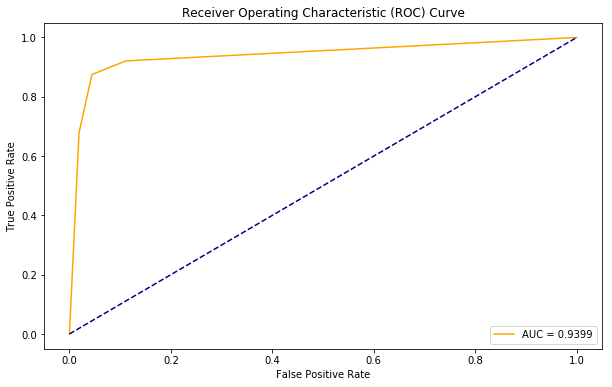

In [24]:
plt.figure(figsize = (10,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr1, tpr1, 'Orange', label = 'AUC = %0.4f' %roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistic Regression

In [25]:
LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)
y_pred2 = LogReg.predict(x_test)
y_pred2

C:\Users\Subhadri\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
LogReg_accuracy = LogReg.score(x_test, y_test) * 100
LogReg_accuracy

84.53522300958733

In [27]:
LogReg.coef_

array([[-3.75972447e+00,  6.31873424e-01, -2.62557592e-01,
         3.63609478e-03,  2.85253096e-01, -1.33838140e+00,
        -1.19736887e+00,  5.06588296e-02, -1.33769970e-02,
        -3.99456434e-01, -8.67832518e-02,  1.27258968e-01,
        -4.09746271e-01, -4.16488276e-02, -1.57634414e-02,
         4.94016969e-02,  9.10508653e-02,  7.15597216e-02]])

In [28]:
LogReg.intercept_

array([-0.62750397])

In [29]:
cm2 = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix is:', cm2, sep='\n')

Confusion Matrix is:
[[1942   65]
 [ 306   86]]


In [30]:
probability2 = LogReg.predict_proba(x_test)
probability2

array([[0.8332313 , 0.1667687 ],
       [0.90519775, 0.09480225],
       [0.96066475, 0.03933525],
       ...,
       [0.85117151, 0.14882849],
       [0.80669427, 0.19330573],
       [0.80936726, 0.19063274]])

In [31]:
probability_positive2 = probability2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, probability_positive2)
roc_auc2 = metrics.auc(fpr2, tpr2)
print('Area under the curve:', roc_auc2)

Area under the curve: 0.8337006701036169


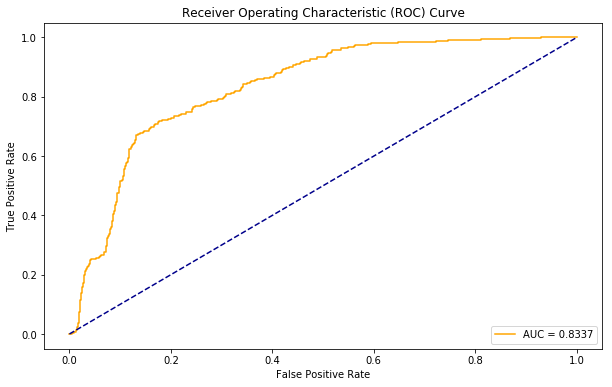

In [32]:
plt.figure(figsize = (10,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr2, tpr2, 'Orange', label = 'AUC = %0.4f' %roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Naive Bayes
- Gaussian NB
- Multinomial NB
- Bernouli NB

### GaussianNB

In [33]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred3 = gnb.predict(x_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
gnb_accuracy = (metrics.accuracy_score(y_test, y_pred3)) * 100
gnb_accuracy

82.65944143393081

In [35]:
cm3 = confusion_matrix(y_test, y_pred3)
print('Confusion Matrix is:', cm3, sep='\n')

Confusion Matrix is:
[[1709  298]
 [ 118  274]]


In [36]:
probability3 = gnb.predict_proba(x_test)
probability3

array([[5.63718003e-01, 4.36281997e-01],
       [5.51794756e-01, 4.48205244e-01],
       [9.99876356e-01, 1.23643959e-04],
       ...,
       [8.09737943e-01, 1.90262057e-01],
       [9.99939251e-01, 6.07492406e-05],
       [7.96004908e-01, 2.03995092e-01]])

In [37]:
probability_positive3 = probability3[:,1]
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, probability_positive3)
roc_auc3 = metrics.auc(fpr3, tpr3)
print('Area under the curve:', roc_auc3)

Area under the curve: 0.8451808974710959


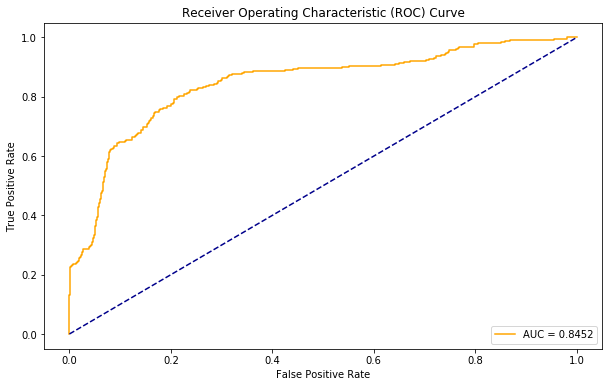

In [38]:
plt.figure(figsize = (10,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr3, tpr3, 'Orange', label = 'AUC = %0.4f' %roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### MultinomialNB

In [39]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred4 = mnb.predict(x_test)
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
mnb_accuracy = (metrics.accuracy_score(y_test, y_pred4)) * 100
mnb_accuracy

83.65985827428095

In [41]:
cm4 = confusion_matrix(y_test, y_pred4)
print('Confusion Matrix is:', cm4, sep='\n')

Confusion Matrix is:
[[2007    0]
 [ 392    0]]


In [42]:
probability4 = mnb.predict_proba(x_test)
probability4

array([[0.82480725, 0.17519275],
       [0.81932205, 0.18067795],
       [0.9422558 , 0.0577442 ],
       ...,
       [0.83364275, 0.16635725],
       [0.67933003, 0.32066997],
       [0.77596307, 0.22403693]])

In [43]:
probability_positive4 = probability4[:,1]
fpr4, tpr4, threshold4 = metrics.roc_curve(y_test, probability_positive4)
roc_auc4 = metrics.auc(fpr4, tpr4)
print('Area under the curve:', roc_auc4)

Area under the curve: 0.7992523616322462


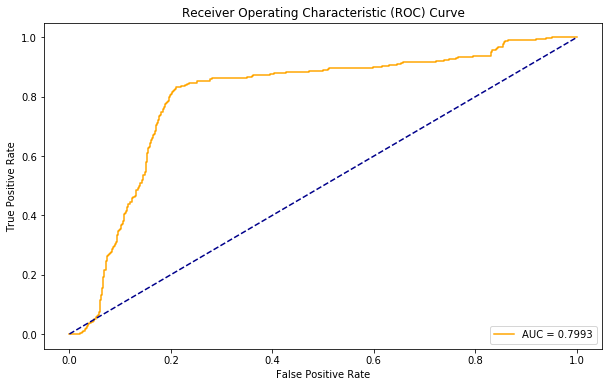

In [44]:
plt.figure(figsize = (10,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr4, tpr4, 'Orange', label = 'AUC = %0.4f' %roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### BernoulliNB

In [45]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred5 = bnb.predict(x_test)
y_pred5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
bnb_accuracy = (metrics.accuracy_score(y_test, y_pred5)) * 100
bnb_accuracy

83.65985827428095

In [47]:
cm5 = confusion_matrix(y_test, y_pred5)
print('Confusion Matrix is:', cm5, sep='\n')

Confusion Matrix is:
[[2007    0]
 [ 392    0]]


In [48]:
probability5 = bnb.predict_proba(x_test)
probability5

array([[0.79770526, 0.20229474],
       [0.79088087, 0.20911913],
       [0.98466981, 0.01533019],
       ...,
       [0.80364256, 0.19635744],
       [0.94318603, 0.05681397],
       [0.79348677, 0.20651323]])

In [49]:
probability_positive5 = probability5[:,1]
fpr5, tpr5, threshold5 = metrics.roc_curve(y_test, probability_positive5)
roc_auc5 = metrics.auc(fpr5, tpr5)
print('Area under the curve:', roc_auc5)

Area under the curve: 0.5971586691477787


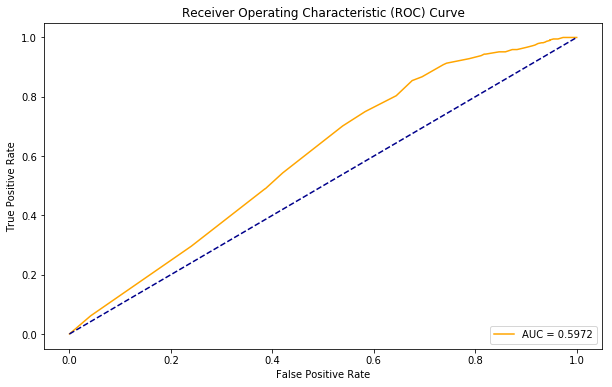

In [50]:
plt.figure(figsize = (10,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr5, tpr5, 'Orange', label = 'AUC = %0.4f' %roc_auc5)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree

In [51]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred6 = dt.predict(x_test)
y_pred6

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
dt_accuracy = (metrics.accuracy_score(y_test, y_pred6)) * 100
dt_accuracy

96.54022509378908

In [53]:
cm6 = confusion_matrix(y_test, y_pred6)
print('Confusion Matrix is:', cm6, sep='\n')

Confusion Matrix is:
[[1954   53]
 [  30  362]]


In [54]:
probability6 = dt.predict_proba(x_test)
probability6

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [55]:
probability_positive6 = probability6[:,1]
fpr6, tpr6, threshold6 = metrics.roc_curve(y_test, probability_positive6)
roc_auc6 = metrics.auc(fpr6, tpr6)
print('Area under the curve:', roc_auc6)

Area under the curve: 0.9485309071311634


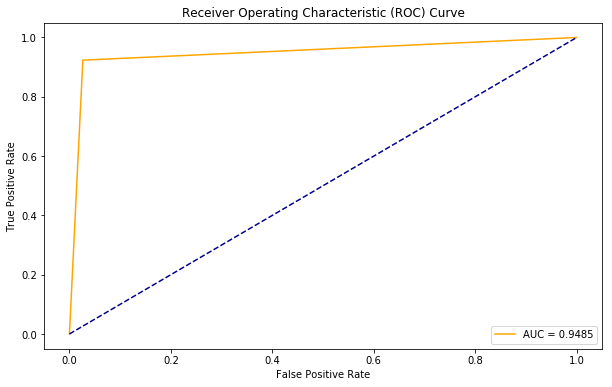

In [56]:
plt.figure(figsize = (10,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr6, tpr6, 'Orange', label = 'AUC = %0.4f' %roc_auc6)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest

In [57]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(x_train, y_train)
y_pred7 = rf.predict(x_test)
y_pred7

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
rf_accuracy = (metrics.accuracy_score(y_test, y_pred7)) * 100
rf_accuracy

98.24927052938725

In [59]:
cm7 = confusion_matrix(y_test, y_pred7)
print('Confusion Matrix is:', cm7, sep='\n')

Confusion Matrix is:
[[1998    9]
 [  33  359]]


In [60]:
probability7 = rf.predict_proba(x_test)
probability7

array([[0.98, 0.02],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.86, 0.14]])

In [61]:
probability_positive7 = probability7[:,1]
fpr7, tpr7, threshold7 = metrics.roc_curve(y_test, probability_positive7)
roc_auc7 = metrics.auc(fpr7, tpr7)
print('Area under the curve:', roc_auc7)

Area under the curve: 0.9799305746214779


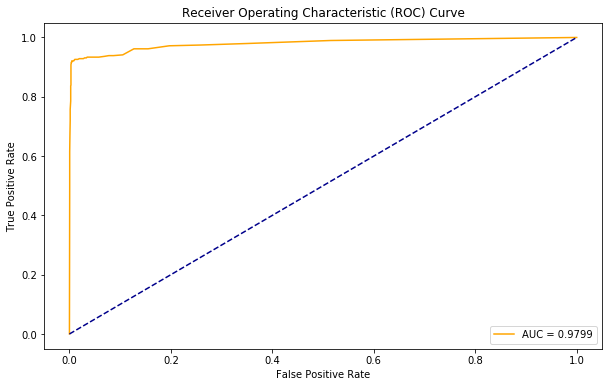

In [62]:
plt.figure(figsize = (10,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr7, tpr7, 'Orange', label = 'AUC = %0.4f' %roc_auc7)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Ada Boost

In [63]:
ab = AdaBoostClassifier(n_estimators = 100)
ab.fit(x_train, y_train)
y_pred8 = ab.predict(x_test)
y_pred8

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
ab_accuracy = (metrics.accuracy_score(y_test, y_pred8)) * 100
ab_accuracy

96.33180491871613

In [65]:
cm8 = confusion_matrix(y_test, y_pred8)
print('Confusion Matrix is:', cm8, sep='\n')

Confusion Matrix is:
[[1961   46]
 [  42  350]]


In [66]:
probability8 = ab.predict_proba(x_test)
probability8

array([[0.51280443, 0.48719557],
       [0.58890089, 0.41109911],
       [0.52246001, 0.47753999],
       ...,
       [0.5143842 , 0.4856158 ],
       [0.67794879, 0.32205121],
       [0.50668986, 0.49331014]])

In [67]:
probability_positive8 = probability8[:,1]
fpr8, tpr8, threshold8 = metrics.roc_curve(y_test, probability_positive8)
roc_auc8 = metrics.auc(fpr8, tpr8)
print('Area under the curve:', roc_auc8)

Area under the curve: 0.9781021526697375


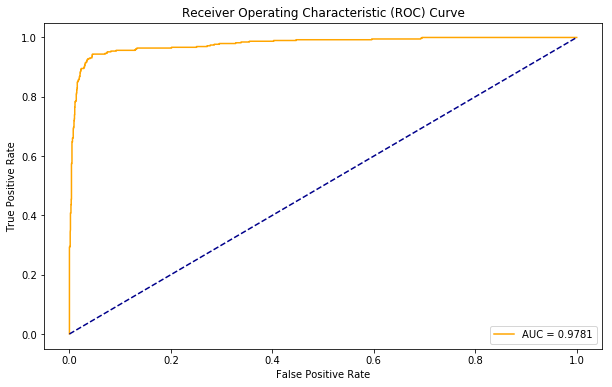

In [68]:
plt.figure(figsize = (10,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr8, tpr8, 'Orange', label = 'AUC = %0.4f' %roc_auc8)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gradient Boosting

In [69]:
gb = GradientBoostingClassifier(n_estimators = 100)
gb.fit(x_train, y_train)
y_pred9 = gb.predict(x_test)
y_pred9

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
gb_accuracy = (metrics.accuracy_score(y_test, y_pred9)) * 100
gb_accuracy

98.08253438932888

In [71]:
cm9 = confusion_matrix(y_test, y_pred9)
print('Confusion Matrix is:', cm9, sep='\n')

Confusion Matrix is:
[[1989   18]
 [  28  364]]


In [72]:
probability9 = gb.predict_proba(x_test)
probability9

array([[0.98553895, 0.01446105],
       [0.99465553, 0.00534447],
       [0.99573468, 0.00426532],
       ...,
       [0.99090361, 0.00909639],
       [0.99050945, 0.00949055],
       [0.67215347, 0.32784653]])

In [73]:
probability_positive9 = probability9[:,1]
fpr9, tpr9, threshold9 = metrics.roc_curve(y_test, probability_positive9)
roc_auc9 = metrics.auc(fpr9,tpr9)
print('Area under the curve:', roc_auc9)

Area under the curve: 0.9873078155028827


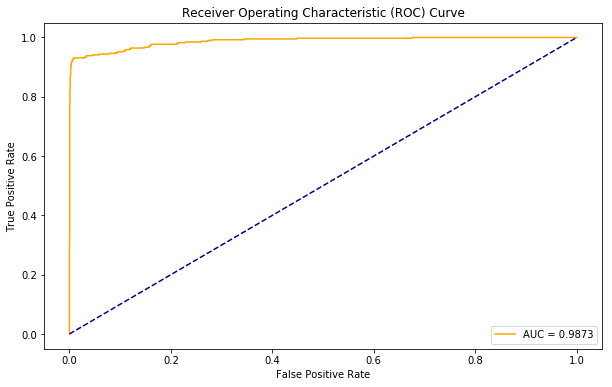

In [74]:
plt.figure(figsize = (10,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr9, tpr9, 'Orange', label = 'AUC = %0.4f' %roc_auc9)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XG Boost

In [75]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred0 = xgb.predict(x_test)
y_pred0

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
xgb_accuracy = (metrics.accuracy_score(y_test, y_pred0)) * 100
xgb_accuracy

97.99916631929972

In [77]:
cm0 = confusion_matrix(y_test, y_pred0)
print('Confusion Matrix is:', cm0, sep='\n')

Confusion Matrix is:
[[1990   17]
 [  31  361]]


In [78]:
probability0 = xgb.predict_proba(x_test)
probability0

array([[0.98013073, 0.01986928],
       [0.9960606 , 0.0039394 ],
       [0.99553776, 0.00446225],
       ...,
       [0.98526394, 0.01473608],
       [0.99149746, 0.00850257],
       [0.61647284, 0.38352713]], dtype=float32)

In [79]:
probability_positive0 = probability0[:,1]
fpr0, tpr0, threshold0 = metrics.roc_curve(y_test, probability_positive0)
roc_auc0 = metrics.auc(fpr0, tpr0)
print('Area under the curve:', roc_auc0)

Area under the curve: 0.9862528344671202


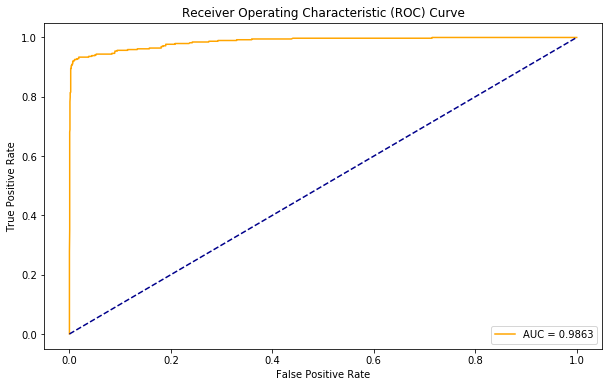

In [80]:
plt.figure(figsize = (10,6))
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr0, tpr0, 'Orange', label = 'AUC = %0.4f' %roc_auc0)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Which model gives best accuracy and why?
Random Forest is giving 98.24% of accuracy which is higher compared to any other model used for this dataset classification. Random Forest helps in forming a combination of 'n' number of Decision Trees, thus, forming a random forest based on random datapoints. Therefore, Random Forest helps in avoiding overfitting.

### Do you feel accuracy is a good performance evaluation metric for the given data? If yes, justify your answer. If no, justify your answer and suggest alternative metric/s.
For the above dataset, accuracy is never a good evaluation metric. AUC-ROC is a better metric for the above dataset as it tells how much model is capable of distinguishing between classes. AUC represents the degree or measure of separability and ROC represents a probability curve. SO, higher the AUC, better the model. According to that we can see, Gradient Boosing and XG Boost are having 99% coverage under the AUC. And even it might be said that for this dataset, Confusion Matrix is a better metric than accuracy. So, lower the number of records in false positives and false negatives, higher the accuracy of the model.